# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':    # 資料type為object (多類別的 type)        
        if len(list(app_train[col].unique())) <= 2:                # 如果只有兩種值的類別型欄位
            app_train[col] = le.fit_transform(app_train[col])      # 就做 Label Encoder, 以加入相關係數檢查        
print(app_train.shape)
app_train.head()

(307511, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,day_birth_grp,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False


In [18]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
(app_train['DAYS_BIRTH']/365).describe() # 換成年

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [19]:
# 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
b_bins = [20,30,40,50,60,70]
app_train['day_birth_grp'] = pd.cut( (app_train['DAYS_BIRTH']/365),  b_bins)
app_train['day_birth_grp'].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: day_birth_grp, dtype: int64

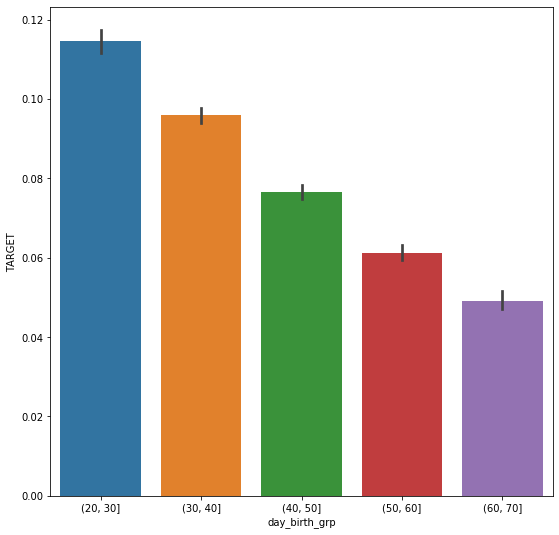

In [25]:
# 年齡與 [TARGET] 的關係圖 (長條圖)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.barplot(app_train['day_birth_grp'], app_train['TARGET'])
plt.show()

# 雖然TARGET 只有 1,0 但因為是範圍中的平均，所以可以看到隨著[BIRTH_DAYS]的增加，[TARGET]中出現 1 的機率下降，0 的機率上升

In [35]:
# 受雇天數
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
print((app_train['DAYS_EMPLOYED']/360).describe()) # 年


app_train['day_employed_grp'] = pd.cut(app_train['DAYS_EMPLOYED']/365, bins=4)
print("\n\n", app_train['day_employed_grp'].value_counts())

count    252137.000000
mean          6.622693
std           6.495445
min           0.000000
25%           2.130556
50%           4.577778
75%           8.819444
max          49.755556
Name: DAYS_EMPLOYED, dtype: float64


 (-0.0491, 12.268]    215921
(12.268, 24.537]      29536
(24.537, 36.805]       6031
(36.805, 49.074]        649
Name: day_employed_grp, dtype: int64


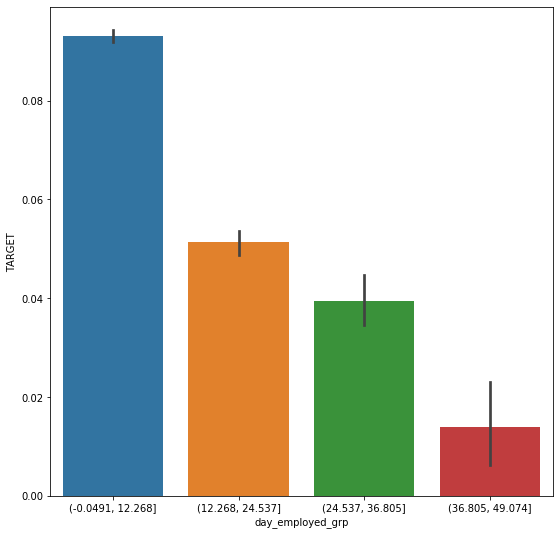

In [37]:
# 雇用天數和 ['TARGET'] 的趨勢關係圖
plt.figure(figsize=(9,9))
sns.barplot(app_train['day_employed_grp'], app_train['TARGET'])
plt.show()


In [44]:
app_train['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64